### **SALES FORCE OPTIMISATION ALGORITHM**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Load Dataset**

In [2]:
ad=pd.read_csv('KAG_conversion_data.csv')

**Exploration**

In [3]:
ad.shape

(1143, 11)

In [4]:
ad.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
# check null values
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
# modify datatype of several columns 
ad['interest']=ad['interest'].astype('object',copy=False )
ad['Spent']= ad['Spent'].astype('int64')
ad['ad_id']= ad['Spent'].astype('int64')

**Add New Indicator + Drop Irrelavant Column**

In [7]:
# drop "fb_campaign_id" column, which won't be used in the analysis
ad= ad.drop('fb_campaign_id',axis=1)

In [8]:
# add new indicators as columns
ad['CPM']= ad['Spent']/ad['Impressions']*1000
ad['CPC']= ad['Spent']/ad['Clicks']
ad['CPA']= ad['Spent']/ad['Total_Conversion']


#supposing each Approved_Conversion worth 100 euros
ad['revenue']=ad['Approved_Conversion']*100
ad['profit']= ad.revenue-ad.Spent

In [9]:
# check result
ad.sample(5)

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CPC,CPA,revenue,profit
597,59,1178,30-34,M,63,287976,31,59,3,2,0.204878,1.903226,19.666667,200,141
1051,27,1178,30-34,M,103,189761,18,27,4,1,0.142284,1.500000,6.750000,100,73
385,10,936,35-39,F,27,18421,7,10,1,0,0.542859,1.428571,10.000000,0,-10
788,33,1178,45-49,M,23,99698,21,33,1,0,0.331000,1.571429,33.000000,0,-33
848,33,1178,30-34,F,21,119772,20,33,5,2,0.275523,1.650000,6.600000,200,167


**OPTIMISATION ANALYSIS**

***Correlation Matrix***

In [10]:
ad.corr()

,ad_id,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CPC,CPA,revenue,profit
ad_id,1.000000,0.475902,0.970369,0.992903,1.000000,0.725464,0.593210,0.280018,0.314461,0.519411,0.593210,0.115320
xyz_campaign_id,0.475902,1.000000,0.495273,0.469729,0.475902,0.346684,0.284968,0.194740,0.570105,0.428394,0.284968,0.058161
Impressions,0.970369,0.495273,1.000000,0.948514,0.970369,0.812838,0.684249,0.215433,0.341867,0.433476,0.684249,0.245921
Clicks,0.992903,0.469729,0.948514,1.000000,0.992903,0.694632,0.559526,0.288919,0.275442,0.531294,0.559526,0.078134
Spent,1.000000,0.475902,0.970369,0.992903,1.000000,0.725464,0.593210,0.280018,0.314461,0.519411,0.593210,0.115320
Total_Conversion,0.725464,0.346684,0.812838,0.694632,0.725464,1.000000,0.864034,0.102869,0.245148,0.050166,0.864034,0.618769
Approved_Conversion,0.593210,0.284968,0.684249,0.559526,0.593210,0.864034,1.000000,0.069216,0.218813,0.013095,1.000000,0.868086
CPM,0.280018,0.194740,0.215433,0.288919,0.280018,0.102869,0.069216,1.000000,0.269513,0.373752,0.069216,-0.087263
CPC,0.314461,0.570105,0.341867,0.275442,0.314461,0.245148,0.218813,0.269513,1.000000,0.295062,0.218813,0.079033
CPA,0.519411,0.428394,0.433476,0.531294,0.519411,0.050166,0.013095,0.373752,0.295062,1.000000,0.013095,-0.304166


In [11]:
ad_num= ad[['revenue','Impressions','Clicks', 'Total_Conversion', 'Spent']]

ad_num.sample(3)

,revenue,Impressions,Clicks,Total_Conversion,Spent
630,100,94257,7,1,12
3,0,4259,1,1,1
445,0,1909,1,1,0


Text(0.5, 0.98, 'Correlation heatmap of numerical features')

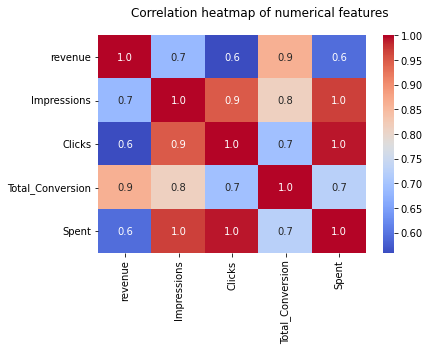

In [12]:
xg = sns.heatmap(ad_num.corr(),annot=True,fmt=".1f",cmap='coolwarm')
plt.suptitle("Correlation heatmap of numerical features")

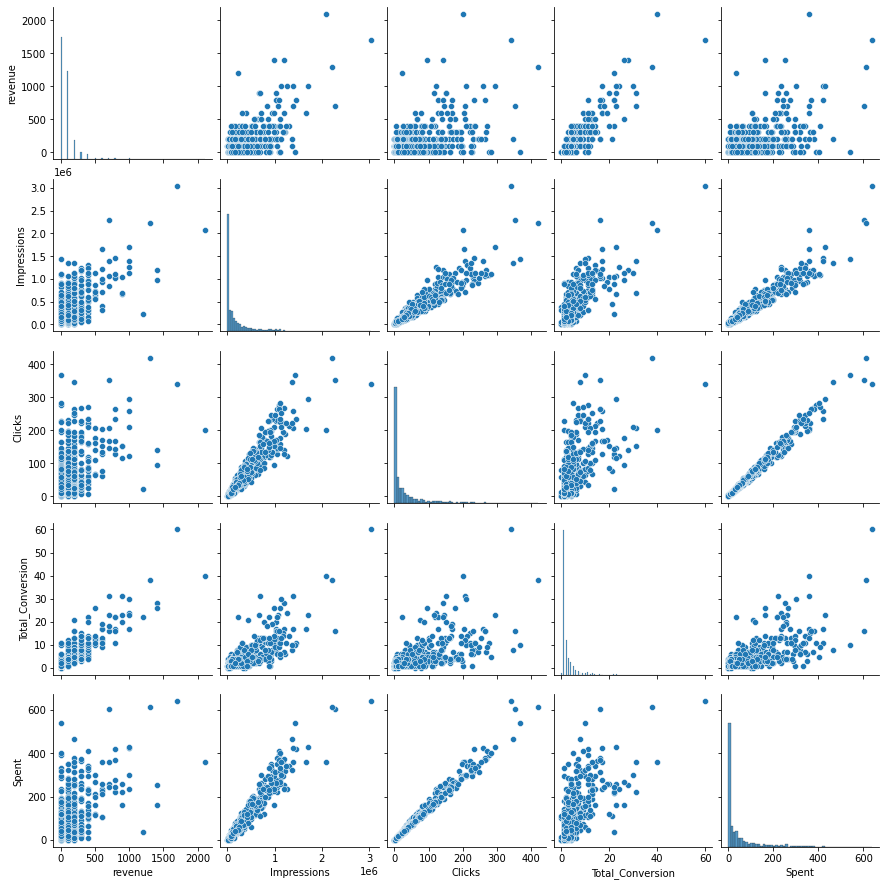

In [13]:
sns.pairplot(ad_num)

Observation:

1. "Total_conversion" and "impression" are more closely related to core indicator "revenue" than "spent" and "click".
2. High correlation coefficient"revenue" and "total_conversion" is not surprising since approved_conversion is the next stage of total_conversion in the conversion funnel.


Text(0.5, 0.98, 'Profit by age')

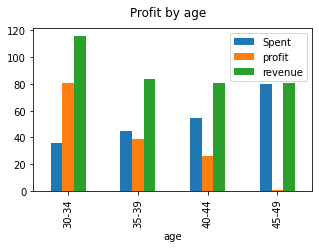

In [14]:
plt.rcParams['figure.figsize']=(5,3)
a = pd.pivot_table(data=ad, index='age',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by age")

Text(0.5, 0.98, 'Profit by gender')

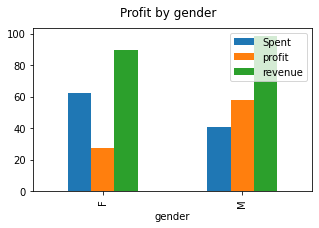

In [16]:
# which age group is willing to pay?

a = pd.pivot_table(data=ad, index='gender',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by gender")

**Interest+Age**

Text(0.5, 0.98, 'Profit by age& interest')

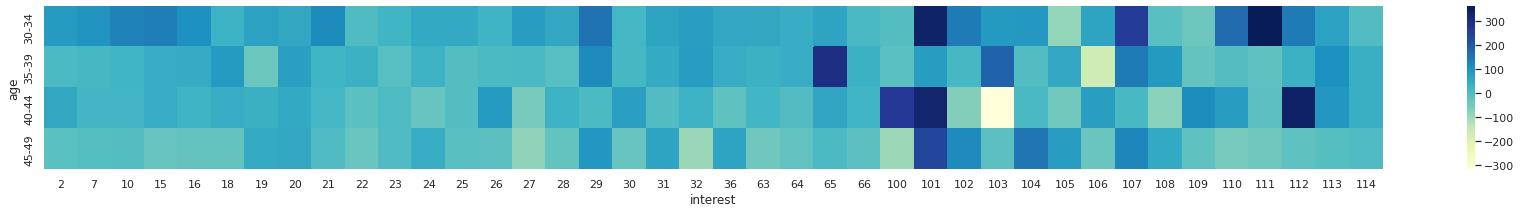

<Figure size 1440x576 with 0 Axes>

In [17]:
# revenue heatmap for interest+ age
ia= pd.pivot_table(data=ad,index='interest',columns='age',values='profit',aggfunc="mean",fill_value=0   )

sns.set(rc={'figure.figsize':(30,3)})
sns.heatmap(ia.T,cmap="YlGnBu");
plt.figure(figsize=(20,8))
plt.suptitle("Profit by age& interest")

 Observation:

In the heatmap above, darker means higher average income.
Obviously, combining age and interest group is another direction for optimization.
We need to overturn our old impressions of age groups.**